# Notebook 2: Exploratory Data Analysis (EDA)

## 1. Objective

This notebook is the core of our **Data Analytics & Visualization (DAV)** work.

In Notebook 1, we successfully sourced, generated, and saved a high-quality synthetic dataset: `rockfall_synthetic_data.csv`.

The purpose of *this* notebook is to load that data and perform a deep Exploratory Data Analysis (EDA). We will "interrogate" the data visually, using a wide variety of plots to:

1.  **Analyze Distributions:** Understand the shape, center, and spread of each individual feature.
2.  **Identify Correlations:** Visually confirm the relationships we engineered (and discover new ones).
3.  **Find Outliers:** Identify any extreme or unusual data points.
4.  **Understand Feature-Target Relationships:** Visually analyze how each feature (e.g., `displacement_mm`) relates to the final `risk_level`.

This analysis will provide all the insights necessary to build an effective model in Notebook 3.

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Define File Paths ---
BASE_DIR = '..'
DATA_DIR = os.path.join(BASE_DIR, 'data')
DATA_FILE = os.path.join(DATA_DIR, 'rockfall_synthetic_data.csv')

# --- 2. Load the Data ---
try:
    df = pd.read_csv(DATA_FILE)
    print(f"Successfully loaded '{os.path.basename(DATA_FILE)}'.")
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"The file '{os.path.basename(DATA_FILE)}' was not found at: {DATA_FILE}")
    print("Please make sure Notebook 1 was run successfully and the file was saved.")
except Exception as e:
    print(f"An error occurred: {e}")

# --- 3. Initial Data Inspection ---
if 'df' in locals():
    print("\n--- Data Head (First 5 Rows) ---")
    print(df.head())
    
    print("\n--- Data Info (Column Types and Nulls) ---")
    print(df.info())

Successfully loaded 'rockfall_synthetic_data.csv'.
Dataset has 20000 rows and 6 columns.

--- Data Head (First 5 Rows) ---
   rainfall_mm_past_24h  seismic_activity  joint_water_pressure_kPa  \
0             16.351962          1.042005                 41.542877   
1              4.133069          1.410756                 34.360071   
2              7.764729          1.554489                 38.339998   
3             14.857486          1.517141                 50.282894   
4              0.000000          0.941456                 31.325325   

   vibration_level  displacement_mm risk_level  
0         0.206142         6.991127        Low  
1         0.349532         8.686621        Low  
2         0.384975        10.007807        Low  
3         0.351243        13.029807     Medium  
4         0.266100         8.382537        Low  

--- Data Info (Column Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #  

## 2. Analysis of Target Variable (`risk_level`)

Before we analyze the features, we must first understand our **target variable**.

We need to know the distribution of our classes ("Low", "Medium", "High", "Critical"). This will tell us how "imbalanced" our dataset is, which is a critical piece of information for our modeling strategy in Notebook 3.

In [6]:
# ---
# ### 2.1. Analyze Target Variable Distribution
# ---

# We will get the counts of each risk level
risk_counts = df['risk_level'].value_counts()
risk_percent = df['risk_level'].value_counts(normalize=True) * 100

print("--- Target Variable Distribution (Counts) ---")
print(risk_counts)
print("\n--- Target Variable Distribution (Percentage) ---")
print(risk_percent)

# ---
# Create the visualization
# ---
print("\nGenerating visualization...")

# We will sort the plot in our logical order, not alphabetically
risk_order = ['Low', 'Medium', 'High', 'Critical']

fig = px.bar(
    x=risk_counts.index, 
    y=risk_counts.values,
    title='Distribution of Risk Levels (Our Target Variable)',
    labels={'x': 'Risk Level', 'y': 'Number of Samples'},
    text=risk_counts.values
)

# Set the x-axis order
fig.update_xaxes(categoryorder='array', categoryarray=risk_order)

fig.show()

--- Target Variable Distribution (Counts) ---
risk_level
Low         10095
Medium       8110
High         1452
Critical      343
Name: count, dtype: int64

--- Target Variable Distribution (Percentage) ---
risk_level
Low         50.475
Medium      40.550
High         7.260
Critical     1.715
Name: proportion, dtype: float64

Generating visualization...


## 3. Analysis of Numerical Features

Now that we understand our target variable, we will analyze our 5 **features**.

The goal of this section is to understand the **distribution** (the shape, center, and spread) of each feature. We will plot histograms for all 5 features to see what they look like.

In [7]:
# ---
# ### 3.1. Plot Feature Distributions (Histograms)
# ---

# We will create a list of our 5 numerical features
features = [
    'rainfall_mm_past_24h', 
    'seismic_activity', 
    'joint_water_pressure_kPa', 
    'vibration_level', 
    'displacement_mm'
]

print(f"Generating histograms for {len(features)} features...")

# We will loop through each feature and create a separate plot
for feature in features:
    fig = px.histogram(
        df, 
        x=feature, 
        title=f'Distribution of: {feature}',
        marginal='box'  # This adds a box plot on top, which is great for seeing outliers
    )
    fig.show()

print("Histogram generation complete.")

Generating histograms for 5 features...


Histogram generation complete.


## 4. Analysis of Feature Correlations

We have analyzed each feature individually. Now, we will analyze how they relate **to each other**.

The best way to see this is with a **Correlation Heatmap**.

* A **positive correlation** (e.g., +0.8) means "when Feature A goes up, Feature B *also* goes up."
* A **negative correlation** (e.g., -0.6) means "when Feature A goes up, Feature B goes *down*."
* A **zero correlation** (e.g., 0.1) means they have no relationship.

This plot will help us visually confirm the logical relationships we engineered in Notebook 1.

Calculating correlation matrix...


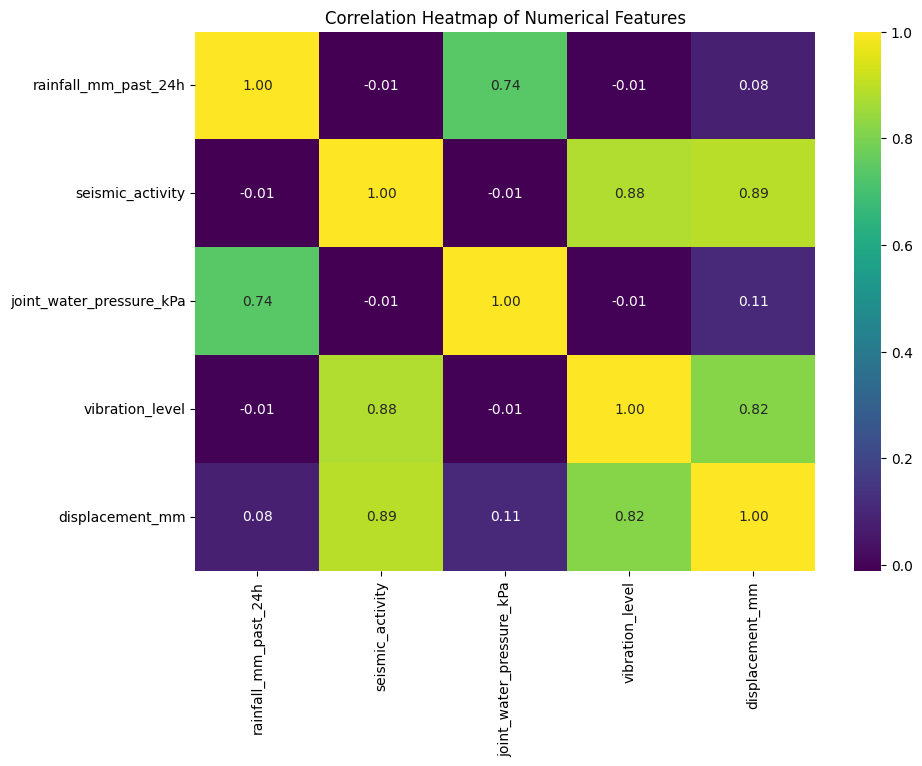


--- Correlation Matrix (Table) ---
                          rainfall_mm_past_24h  seismic_activity  \
rainfall_mm_past_24h                  1.000000         -0.008317   
seismic_activity                     -0.008317          1.000000   
joint_water_pressure_kPa              0.737689         -0.010707   
vibration_level                      -0.005096          0.878877   
displacement_mm                       0.076994          0.892168   

                          joint_water_pressure_kPa  vibration_level  \
rainfall_mm_past_24h                      0.737689        -0.005096   
seismic_activity                         -0.010707         0.878877   
joint_water_pressure_kPa                  1.000000        -0.006205   
vibration_level                          -0.006205         1.000000   
displacement_mm                           0.106332         0.817851   

                          displacement_mm  
rainfall_mm_past_24h             0.076994  
seismic_activity                 0.89216

In [8]:
# ---
# ### 4.1. Generate Correlation Heatmap
# ---

print("Calculating correlation matrix...")

# 1. Calculate the correlation matrix
# We only want to correlate the numerical features
numerical_features = [
    'rainfall_mm_past_24h', 
    'seismic_activity', 
    'joint_water_pressure_kPa', 
    'vibration_level', 
    'displacement_mm'
]

# .corr() is the pandas command to calculate the matrix
corr_matrix = df[numerical_features].corr()

# 2. Create the heatmap visualization
plt.figure(figsize=(10, 7))  # Set the size of the plot
sns.heatmap(
    corr_matrix, 
    annot=True,     # This adds the correlation numbers (e.g., 0.82) to each square
    fmt='.2f',      # Format the numbers to 2 decimal places
    cmap='viridis'  # Use a color-blind friendly color map
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Print the matrix (optional, but good for reference)
print("\n--- Correlation Matrix (Table) ---")
print(corr_matrix)

## 5. Analysis of Feature vs. Target Relationships

We have analyzed:
1.  The **Target** (`risk_level`) distribution.
2.  The **Feature** distributions (histograms).
3.  The **Feature vs. Feature** relationships (heatmap).

Now, we will perform the most critical analysis for modeling: **Feature vs. Target**.

The goal of this section is to answer the question: **"How does the value of a feature (like `displacement_mm`) affect the final `risk_level`?"**

We will use box plots and scatter plots to visualize these relationships. This will show us which features are the strongest predictors of risk.

In [9]:
# ---
# ### 5.1. Visualize Feature vs. Target (Box Plots)
# ---

# We will again loop through our 5 numerical features
features = [
    'rainfall_mm_past_24h', 
    'seismic_activity', 
    'joint_water_pressure_kPa', 
    'vibration_level', 
    'displacement_mm'
]

# Define the logical order for the x-axis
risk_order = ['Low', 'Medium', 'High', 'Critical']

print(f"Generating Box Plots for {len(features)} features vs. Risk Level...")

for feature in features:
    fig = px.box(
        df, 
        x='risk_level', 
        y=feature, 
        color='risk_level', # Color each box by its risk level
        title=f'{feature} by Risk Level'
    )
    
    # Set the x-axis order
    fig.update_xaxes(categoryorder='array', categoryarray=risk_order)
    
    fig.show()

print("Box plot generation complete.")

Generating Box Plots for 5 features vs. Risk Level...


Box plot generation complete.


## 6. Final Multivariate Analysis (Pair Plot)

We have now analyzed our features in several ways. Our last step is to create a **pair plot**.

A pair plot is one of the most powerful visualizations in data analytics. It combines:
1.  **Histograms** (on the diagonal) to show the distribution of a single feature.
2.  **Scatter Plots** (on the grid) to show the relationship between every pair of features.

We will color the scatter plots by the `risk_level`. This will allow us to see how the different risk categories "cluster" together and how our strongest features (like `displacement_mm` and `seismic_activity`) interact to create a "High" or "Critical" event.

Generating final pair plot (this may take a few moments)...


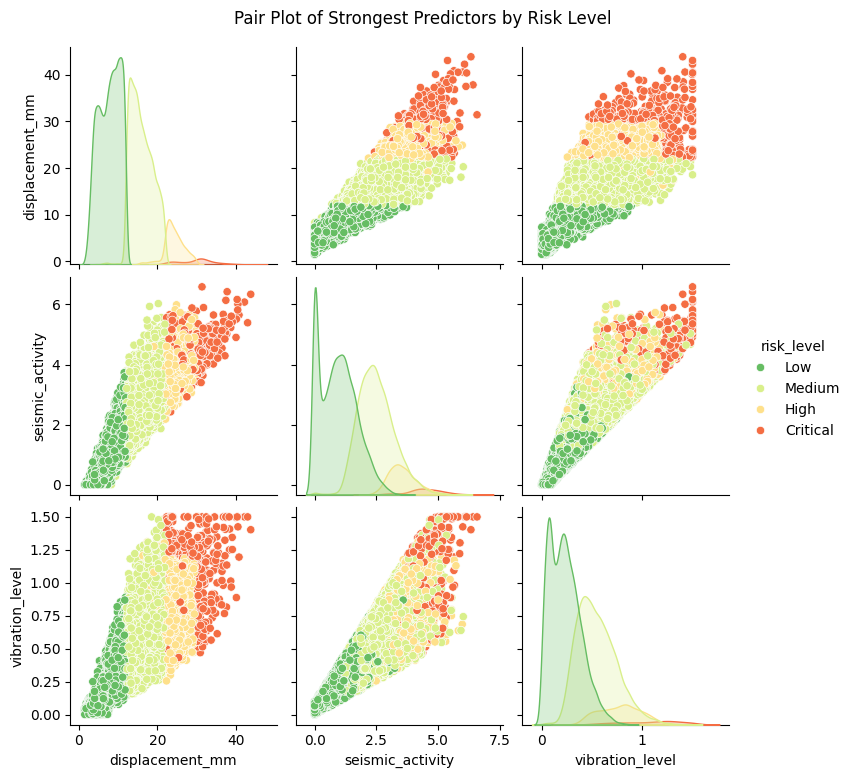

Pair plot generation complete.


In [10]:
# ---
# ### 6.1. Generate Final Pair Plot (Focused)
# ---

# We will focus on our 3 strongest predictors, as identified
# by our box plots and heatmap:
focused_features = [
    'displacement_mm',
    'seismic_activity',
    'vibration_level'
]

# We will also add our target variable for coloring
plot_data = df[focused_features + ['risk_level']]

print("Generating final pair plot (this may take a few moments)...")

# Create the pair plot using Seaborn
fig = sns.pairplot(
    plot_data,
    hue='risk_level',  # Color the dots by their risk level
    hue_order=['Low', 'Medium', 'High', 'Critical'], # Set the logical order
    diag_kind='kde',   # Show a Kernel Density Estimate on the diagonal
    palette='RdYlGn_r' # Use a "Red-Yellow-Green" (reversed) color palette
)

fig.fig.suptitle('Pair Plot of Strongest Predictors by Risk Level', y=1.03) # Add a main title

plt.show()

print("Pair plot generation complete.")

## 7. Exploratory Data Analysis (EDA) - Conclusion

This notebook has successfully loaded and analyzed our new dataset. We have a complete understanding of its properties.

### Key Findings:

1.  **Target Variable (`risk_level`):** The dataset is **imbalanced**, which is realistic. "Low" risk is the most common class (50.5%), while "Critical" risk is the most rare (1.7%). This will be a key challenge for our modeling in Notebook 3.

2.  **Feature Distributions:**
    * `rainfall_mm_past_24h` is **zero-inflated**.
    * `seismic_activity` and `joint_water_pressure_kPa` have clean **normal distributions** ("bell curves").
    * `vibration_level` and `displacement_mm` are **right-skewed**, with a "long tail" of rare, high-value events.

3.  **Feature Correlations (Heatmap):** We confirmed our engineered logic from Notebook 1.
    * `rainfall` -> `joint_water_pressure` (Strong positive correlation: 0.74)
    * `seismic_activity` -> `vibration_level` (Very strong positive correlation: 0.88)

4.  **Predictive Power (Box Plots & Pair Plot):** We have visually identified our most important features.
    * **Strongest Predictors:** `displacement_mm`, `seismic_activity`, and `vibration_level` all show a clear "staircase" pattern, separating the risk levels.
    * **Contributing Predictor:** `joint_water_pressure_kPa` shows a positive but weaker relationship with risk.
    * **Weakest Predictor:** `rainfall_mm_past_24h` has almost no predictive power *by itself*.

We are now fully prepared to move on to **Notebook 3: Preprocessing and Modeling**.